# HW 1 Set 2 - Problem 2 (Smallest Enclosing Circle Problem)

Use the subgradient method, write a program to:
- Find the smallest circle that encloses all the points in the dataset "USCity.xlsx".
- Determine both the center and the radius of this circle.
- Plot the dataset, the enclosing circle and its center. 

In [10]:
import numpy as np
import matplotlib . pyplot as plt
import pandas as pd

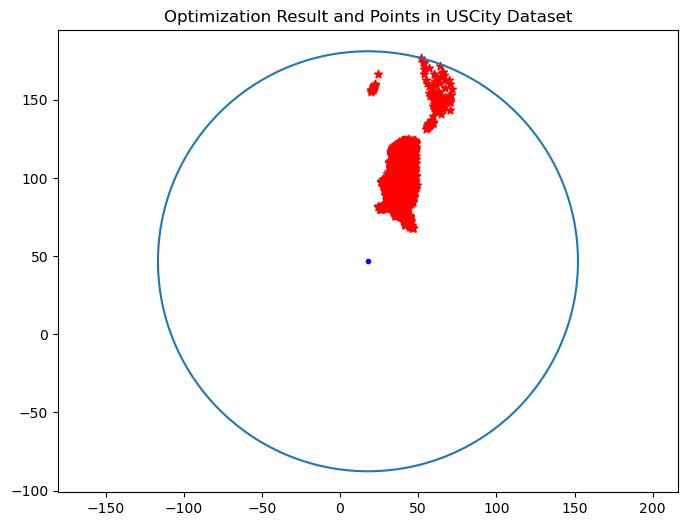

Optimized point z (center): [17.85771488 46.70226996], Minimized maximum ditance V: 134.3276904730337


In [13]:
def f_value (B,x):
    max_distance = np.linalg.norm(x-B[0,:])
    n = B.shape[0]
    
    for i in range(n):
        distance = np.linalg.norm(x-B[i,:])
        max_distance = max(max_distance, distance)
    return max_distance

def sub_d(B,x):
    n = B.shape[0]
    W = np.zeros(n)
    for l in range(n):
        W[l] = np.linalg.norm(x-B[1,:])
    p = np.argmax(W)
    if W[p] == 0:
        z = 0
    else:
        z = (x-B[p,:])/np.linalg.norm(x-B[p,:])
    return z

def draw_disk(center, r):
    t = np.linspace(0, 2*np.pi, 1000)
    x = r * np.cos(t) + center[0]
    y = r * np.sin(t) + center[1]
    plt.figure(figsize=(8, 6))
    plt.plot(x,y)
    plt.axis('equal')
    
def main():
    df = pd.read_excel('USCity.xlsx')
    data = df.values
    A = []
    for row in data:
        array = np.array([row[0], row[1]])
        A.append(array)
    A = np.array(A)
    #A = 10 * np.random.rand(100,2)
    x = np.array([0,0])
    K = 5000
    V = f_value(A, x)
    z = x.copy()
    for i in range(K):
        x = x - 0.01 * sub_d(A,x)
        if f_value(A,x) <= V:
            V = f_value(A,x)
            z = x.copy()
    draw_disk(z, V)
    plt.scatter(A[:,0], A[:,1], c='r', marker='*')
    plt.scatter(z[0], z[1], c='b', marker='.')
    plt.title("Optimization Result and Points in USCity Dataset")
    plt.show()
    print(f"Optimized point z (center): {z}, Minimized maximum ditance V: {V}")
    
if __name__ == "__main__":
    main()